<a href="https://colab.research.google.com/github/EmanuelleChristinie/EmanuelleChristinie/blob/main/Aula3_pythonipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/guilhermeonrails/data-jobs/refs/heads/main/salaries.csv")

In [8]:
df.rename(columns={
    'work_year': 'ano',
    'experience_level': 'senioridade',
    'employment_type': 'contrato',
    'job_title': 'cargo',
    'salary': 'salario',
    'salary_currency': 'moeda',
    'salary_in_usd': 'usd',
    'employee_residence': 'residencia',
    'remote_ratio': 'remoto',
    'company_location': 'empresa',
    'company_size': 'tamanho_empresa'
}, inplace=True)

display(df.columns)

Index(['ano', 'senioridade', 'contrato', 'cargo', 'salario', 'moeda', 'usd',
       'residencia', 'remoto', 'empresa', 'tamanho_empresa'],
      dtype='object')

In [9]:
df_limpo = df.dropna()

In [10]:
df_limpo = df_limpo.assign(ano = df_limpo['ano'].astype('int64'))

In [11]:
df_limpo.head()

,ano,senioridade,contrato,cargo,salario,moeda,usd,residencia,remoto,empresa,tamanho_empresa
0,2025,SE,FT,Solutions Engineer,214000,USD,214000,US,100,US,M
1,2025,SE,FT,Solutions Engineer,136000,USD,136000,US,100,US,M
2,2025,MI,FT,Data Engineer,158800,USD,158800,AU,0,AU,M
3,2025,MI,FT,Data Engineer,139200,USD,139200,AU,0,AU,M
4,2025,EN,FT,Data Engineer,90000,USD,90000,US,0,US,M


<Axes: title={'center': 'Dristribuição de senioridade'}, xlabel='senioridade'>

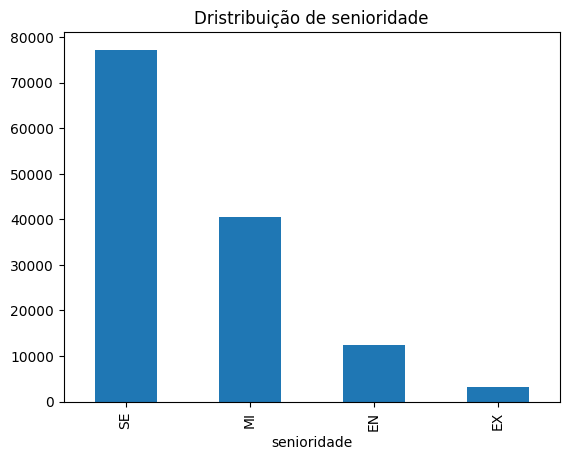

In [12]:
df_limpo["senioridade"].value_counts().plot(kind='bar', title="Dristribuição de senioridade")

In [13]:
import seaborn as sns

<Axes: xlabel='senioridade', ylabel='usd'>

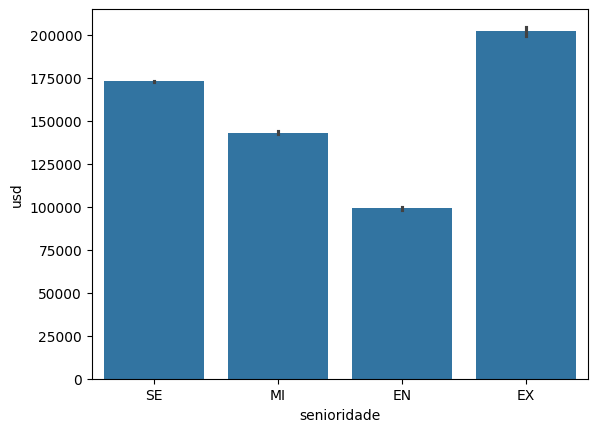

In [14]:
sns.barplot(data=df_limpo, x="senioridade", y="usd")

In [15]:
import matplotlib.pyplot as plt

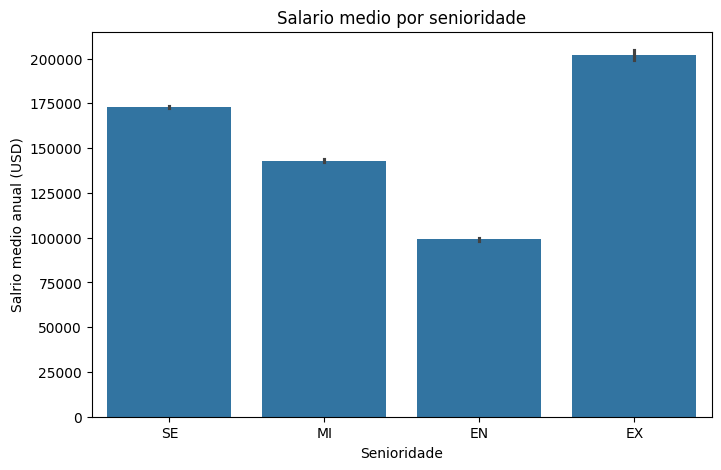

In [17]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd")
plt.title("Salario medio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salrio medio anual (USD)")
plt.show()

In [21]:
df_limpo.groupby("senioridade")['usd'].mean().sort_values(ascending=False)

,usd
senioridade,
EX,202027.667813
SE,172850.838301
MI,143044.845979
EN,99034.963267


In [22]:
ordem = df_limpo.groupby("senioridade")['usd'].mean().sort_values(ascending=False).index

In [23]:
ordem

Index(['EX', 'SE', 'MI', 'EN'], dtype='object', name='senioridade')

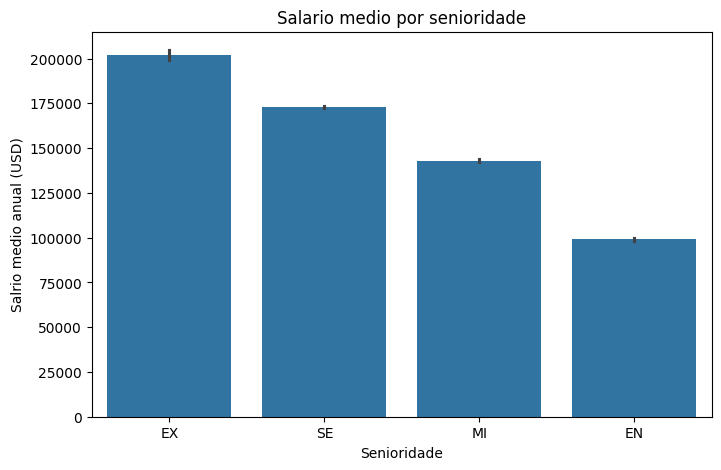

In [24]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_limpo, x="senioridade", y="usd", order=ordem)
plt.title("Salario medio por senioridade")
plt.xlabel("Senioridade")
plt.ylabel("Salrio medio anual (USD)")
plt.show()

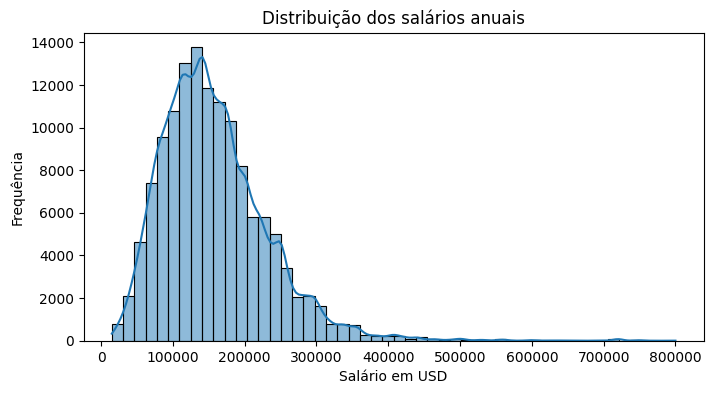

In [36]:
plt.figure(figsize=(8,4))
sns.histplot(df_limpo['usd'], bins = 50, kde=True)
plt.title("Distribuição dos salários anuais")
plt.xlabel("Salário em USD")
plt.ylabel("Frequência")
plt.show()


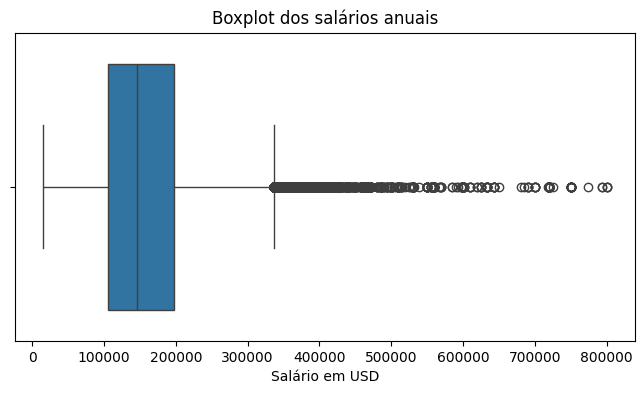

In [41]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df_limpo['usd'])
plt.title("Boxplot dos salários anuais")
plt.xlabel("Salário em USD")
plt.show()

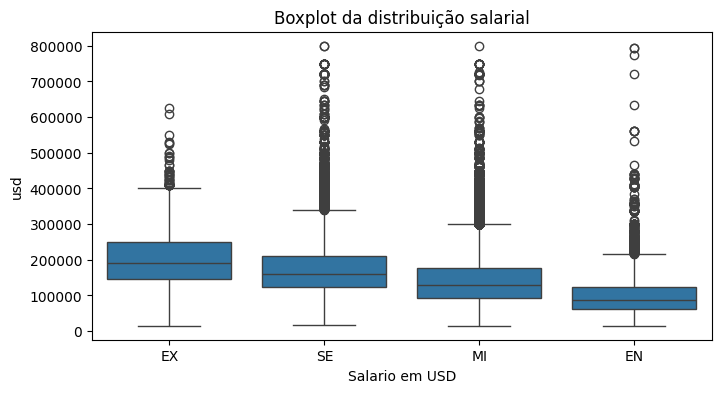

In [44]:
ordem_senioridade = ordem
plt.figure(figsize=(8,4))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade)
plt.title("Boxplot da distribuição salarial")
plt.xlabel("Salario em USD")
plt.show()

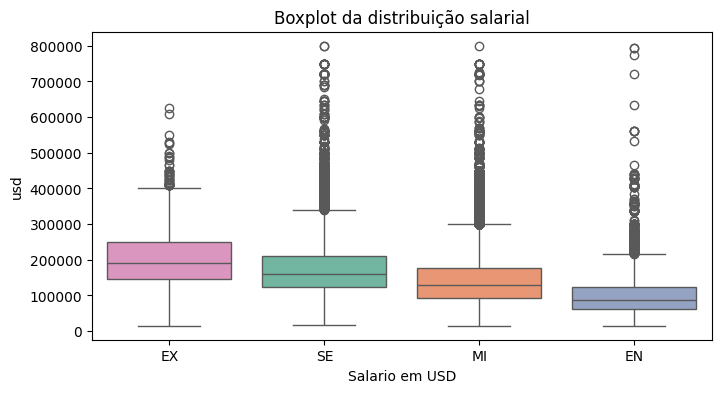

In [45]:
ordem_senioridade = ordem
plt.figure(figsize=(8,4))
sns.boxplot(x='senioridade', y='usd', data=df_limpo, order=ordem_senioridade, palette='Set2', hue='senioridade')
plt.title("Boxplot da distribuição salarial")
plt.xlabel("Salario em USD")
plt.show()

In [48]:
import plotly.express as px

In [53]:
senioridade_media_salario = df_limpo.groupby('senioridade')['usd'].mean().sort_values(ascending=False).reset_index()

fig = px.bar(senioridade_media_salario,
             x='senioridade',
             y='usd',
             title='Media salarial por senioridade',
             labels={"senioridade": "Nivel de Senioridade", 'usd': "Media Salarial Anual (USD)"})

fig.show()

In [56]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names='Tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho')

fig.show()

In [57]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names='Tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5)

fig.show()

In [58]:
remoto_contagem = df_limpo['remoto'].value_counts().reset_index()
remoto_contagem.columns = ['Tipo_trabalho', 'quantidade']


fig = px.pie(remoto_contagem,
             names='Tipo_trabalho',
             values='quantidade',
             title='Proporção dos tipos de trabalho',
             hole=0.5
)

fig.update_traces(textinfo='percent+label')
fig.show()